In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load your data
with open('monroe county car crach 2003-2015.csv', 'r', encoding='ISO-8859-1') as file:
    data = file.read()


In [16]:
import zipfile

# Opening a zip file
with zipfile.ZipFile('car_crash_dataset.zip', 'r') as zip_ref:
    # List info about files in the zip
    zip_ref.printdir()
    # Access file info
    for zip_info in zip_ref.infolist():
        print(zip_info.filename)
        print(zip_info.file_size)
        print(zip_info.date_time)


File Name                                             Modified             Size
monroe county car crach 2003-2015.csv          2024-01-08 13:44:16      6035282
monroe county car crach 2003-2015.csv
6035282
(2024, 1, 8, 13, 44, 16)


In [52]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unzip the file and extract the CSV file
with zipfile.ZipFile('car_crash_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# Load the dataset into a pandas DataFrame (correct way to read the CSV file)
df = pd.read_csv('extracted_files/monroe county car crach 2003-2015.csv', encoding='ISO-8859-1')

# Show the first few rows of the dataset (pandas DataFrame)
print(df.head())

# --- 1. Data Visualization: Number of Crashes per Year ---
# Assuming there's a 'year' column in the dataset
if 'year' in df.columns:
    crashes_per_year = df['year'].value_counts().sort_index()

    plt.figure(figsize=(8, 6))
    crashes_per_year.plot(kind='bar', color='skyblue')
    plt.title('Number of Crashes per Year (2003-2015)')
    plt.xlabel('Year')
    plt.ylabel('Number of Crashes')
    plt.xticks(rotation=45)
    plt.show()

# --- 2. Crashes by Collision Type (if a 'collision_type' column exists) ---
# Let's assume there's a column like 'collision_type' for crash types
if 'collision_type' in df.columns:
    crashes_by_collision_type = df['collision_type'].value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=crashes_by_collision_type.index, y=crashes_by_collision_type.values, palette='viridis')
    plt.title('Crashes by Collision Type')
    plt.xlabel('Collision Type')
    plt.ylabel('Number of Crashes')
    plt.xticks(rotation=45)
    plt.show()

# --- 3. Crashes by Time of Day (if a 'time_of_day' column exists) ---
# If there's a time column, visualize crashes by hour of the day
if 'time_of_day' in df.columns:
    # Assuming the 'time_of_day' column is a timestamp or has hour information
    df['hour'] = pd.to_datetime(df['time_of_day'], errors='coerce').dt.hour
    
    crashes_by_hour = df['hour'].value_counts().sort_index()

    plt.figure(figsize=(8, 6))
    crashes_by_hour.plot(kind='line', marker='o', color='green')
    plt.title('Crashes by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Crashes')
    plt.grid(True)
    plt.show()

# --- 4. Additional visualizations can be added as per the dataset ---


   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [56]:
df.shape

(53943, 11)

In [64]:
# checking for duplicate values3
df.duplicated().sum()

64

In [66]:
# Remove duplicates based on all columns
df = df.drop_duplicates()


In [68]:
df.shape

(53879, 11)

In [74]:
# checking for missing values
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [78]:
df_cleaned = df.dropna()

In [80]:
df=df_cleaned

In [82]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

In [86]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,52520.0,NaN,NaN,NaN,2009.001676,3.765195,2003.0,2006.0,2009.0,2012.0,2015.0
Month,52520.0,NaN,NaN,NaN,6.674714,3.512379,1.0,4.0,7.0,10.0,12.0
Day,52520.0,NaN,NaN,NaN,4.199105,1.90604,1.0,3.0,4.0,6.0,7.0
Weekend?,52520,2,Weekday,39647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,52520.0,NaN,NaN,NaN,1348.699543,529.372076,0.0,1000.0,1400.0,1700.0,2300.0
Collision Type,52520,7,2-Car,36503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Injury Type,52520,4,No injury/unknown,40298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Factor,52520,55,FAILURE TO YIELD RIGHT OF WAY,11168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reported_Location,52520,19013,E 3RD ST,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,52520.0,NaN,NaN,NaN,35.607873,11.25323,0.0,39.142048,39.16443,39.173344,41.228665


In [88]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

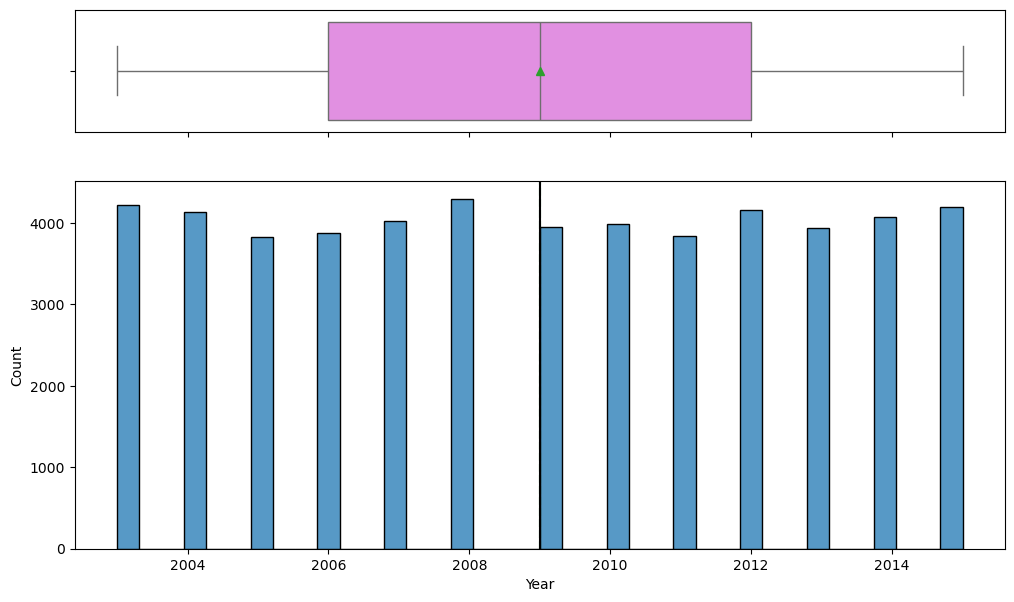

In [92]:
histogram_boxplot(df, 'Year')

In [94]:
### function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

C:\Users\rathi\AppData\Local\Temp\ipykernel_15096\2608628557.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


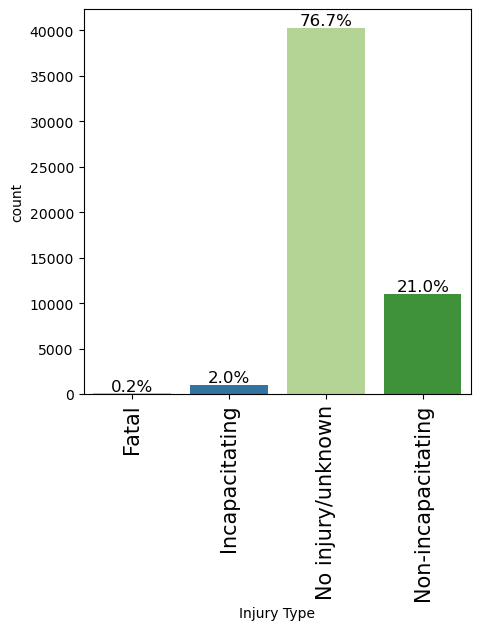

In [96]:
labeled_barplot(df, 'Injury Type', perc=True)

C:\Users\rathi\AppData\Local\Temp\ipykernel_15096\2608628557.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


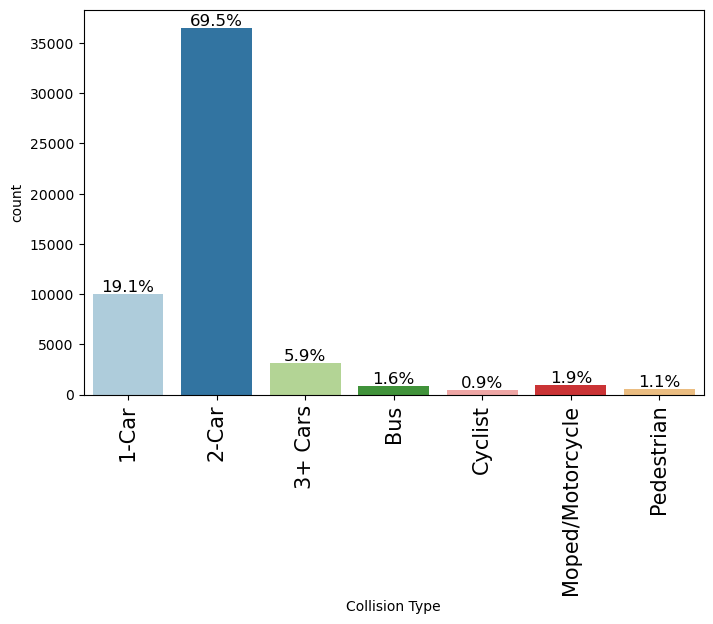

In [98]:
labeled_barplot(df, 'Collision Type', perc=True)

C:\Users\rathi\AppData\Local\Temp\ipykernel_15096\2608628557.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


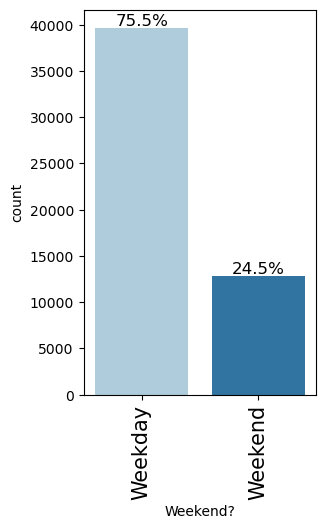

In [100]:
labeled_barplot(df, 'Weekend?', perc=True)

C:\Users\rathi\AppData\Local\Temp\ipykernel_15096\855741920.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='Weekend?', y='Collision Type', ci=False)


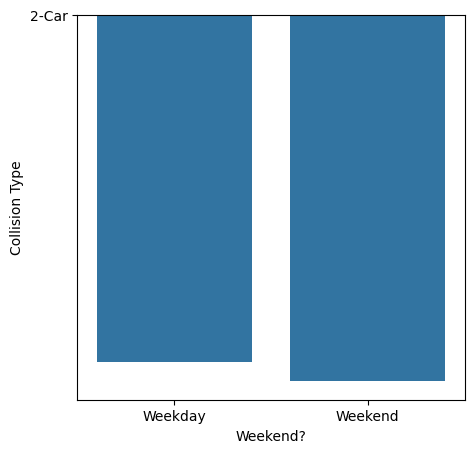

In [114]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='Weekend?', y='Collision Type', ci=False)

plt.show()

C:\Users\rathi\AppData\Local\Temp\ipykernel_15096\2749285872.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.barplot(data=df, x='Collision Type', y='Injury Type', ci=True)


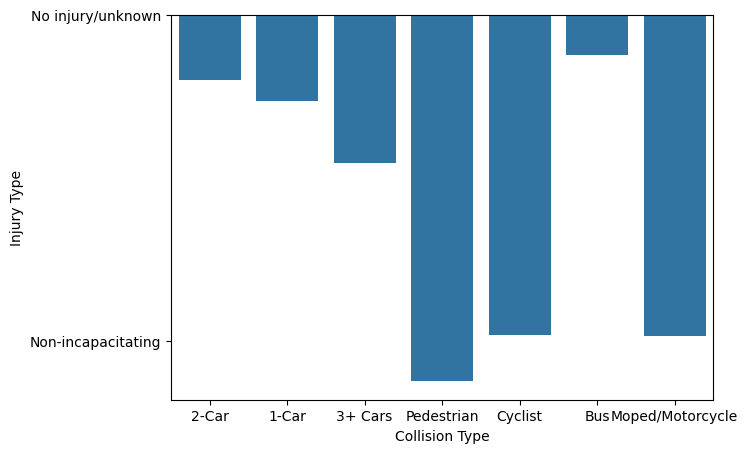

In [120]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Collision Type', y='Injury Type', ci=True)

plt.show()

In [ ]:
## Heat Map

cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [124]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Collision Type  1-Car  2-Car  3+ Cars  Bus  Cyclist  Moped/Motorcycle  \
Year                                                                    
All             10012  36503     3104  840      463               999   
2012              812   2797      232   79       65               111   
2007              701   2861      231   47       63                69   
2014              874   2645      247   92       56                92   
2010              811   2696      221   62       49                86   
2013              828   2660      218   58       45                77   
2011              783   2576      221   57       41                83   
2009              776   2687      250   63       37                85   
2015              860   2865      231   79       35                53   
2008              861   2951      223   69       34               103   
2006              667   2766      248   54       29                79   
2004              651   3108      265   50        5

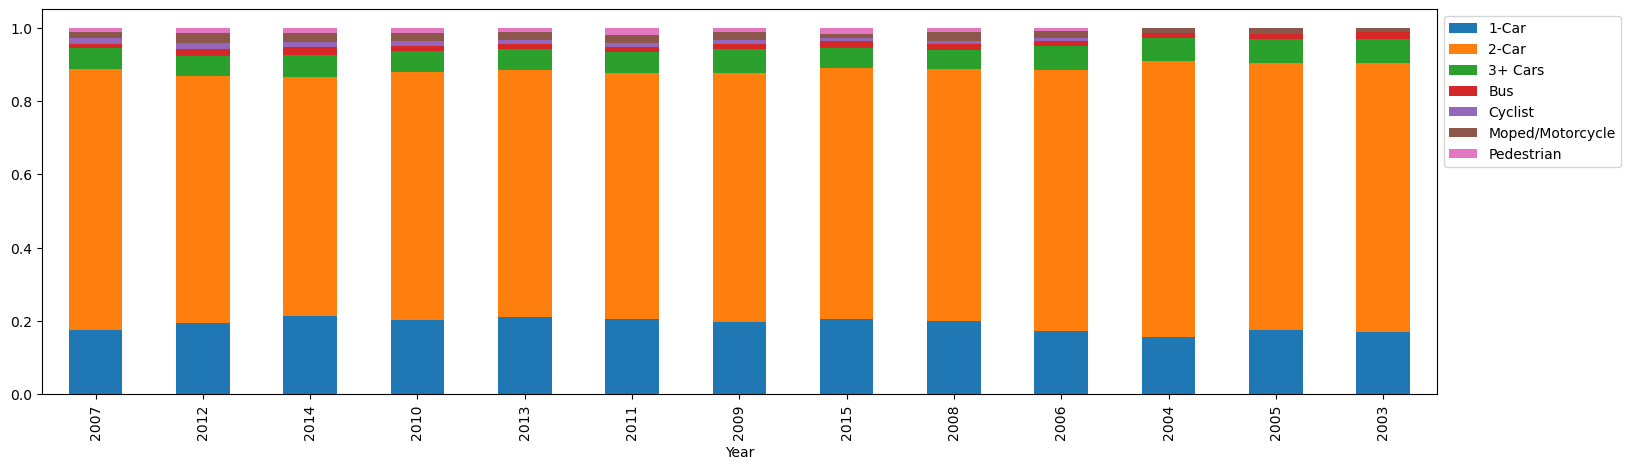

In [126]:
stacked_barplot(df, "Year", "Collision Type")

Primary Factor  ACCELERATOR FAILURE OR DEFECTIVE  ALCOHOLIC BEVERAGES  \
Year                                                                    
2008                                           5                  117   
All                                           50                  797   
2003                                           6                  117   
2004                                           0                  111   
2005                                           1                   93   
2006                                           2                  106   
2007                                           4                  118   
2009                                           1                  120   
2010                                           6                   15   
2011                                           8                    0   
2012                                           6                    0   
2013                                           4   

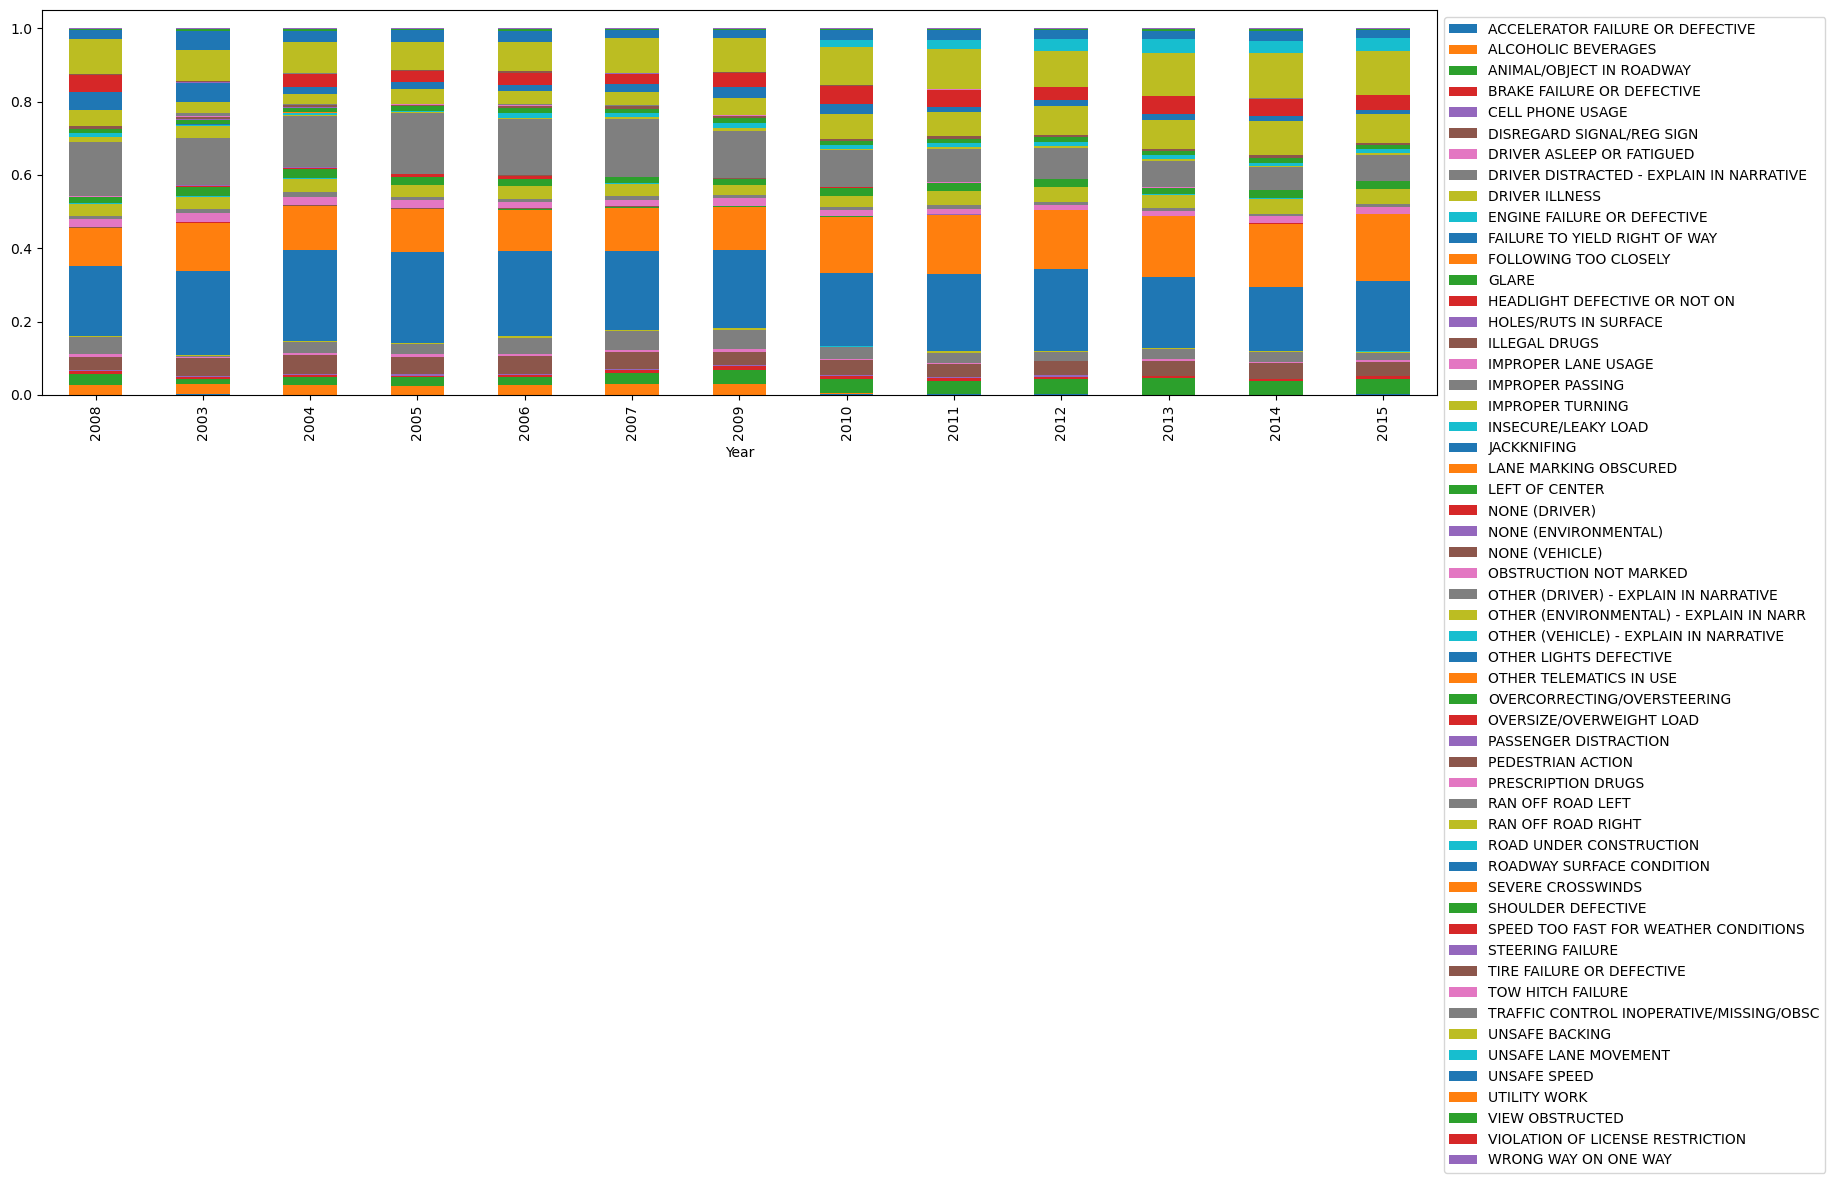

In [130]:
stacked_barplot(df, "Year", "Primary Factor")

In [134]:
from sklearn.model_selection import train_test_split

X = df.drop(["Collision Type"], axis=1)
Y = df["Collision Type"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [136]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (36764, 19076)
Shape of test set :  (15756, 19076)
Percentage of classes in training set:
Collision Type
2-Car               0.696333
1-Car               0.191247
3+ Cars             0.058019
Moped/Motorcycle    0.018660
Bus                 0.016021
Pedestrian          0.011261
Cyclist             0.008459
Name: proportion, dtype: float64
Percentage of classes in test set:
Collision Type
2-Car               0.691990
1-Car               0.189198
3+ Cars             0.061627
Moped/Motorcycle    0.019865
Bus                 0.015930
Pedestrian          0.011742
Cyclist             0.009647
Name: proportion, dtype: float64


In [138]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [155]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install --upgrade scikit-learn

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [ ]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

In [ ]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))